# Idea/Objective
The main idea/objective of the code is to make a simple game/simulator, in preferably pygame, that can help visualise the Reynold's Transport Theorm.\
This is how I want the game to be:

1. For the MVP, There's a game play region, and your mouse, and preferrably an exit button
2. With your mouse, you can click anywhere on the play region. 
3. Whenever you press/hold in a region, particles of some mass are created at that point.
4. The mass can be random, where distribution is normal, or constant
5. The game represents color for the region with different density.
6. The bounding region maybe finite(defined by play region boundaries), or infinite
6. For the MVP, we can start with a black box, constant mass particles with drop size/region of 1/16th of a "pixel" in our region.

What's the catch/what you gotta do?
1. Understand how to solve the complicated RTT numerically on this dumb machine.
2. Understand the RTT thoroughly

# Learning through this/Theory covered
The following document covers the derivation of RTT, but focuses only on the case of mass conservation(equation of continuity), and not yet the topic of momentum conservation. 

# Theory

Reynold's Transport Theorm is an integral law, meaning its valid for regions/curves/volumes, and not a differntial one, meaning that its not valid for points.

The derivation starts by assuming a control volume(CV), extrinsic property $B$, and an intrinsic property $b = \dfrac{b}{m}$ of the system/CV.

The deriviation in the way uses something called the Gauss Divergence Theorm, which we learnt in PH1010. Giving that a visit is a good idea

## 0. GDT Expression

$$
\iint_S \vec{F} \cdot d\vec{S} = \iiint_V (\nabla \cdot \vec{F}) \, dV
$$


## Updates
As it turns out on reading much more about fluid mechanics, the integral law of RTT is *convertible* to a differential form. It is called the Cauchy equations, which on further simplifications lead to the (in)famous Navier-Stokes equations. This conversion requires the GDT.


Secondly, on getting more clarity, the RTT is a bridge between _the dead and the living_ system view of the problem in hand(more inclined to the solid mechanics view), and the control volume view(more inclined towards thermodynamics and fluids point of view)

## 1. The setup

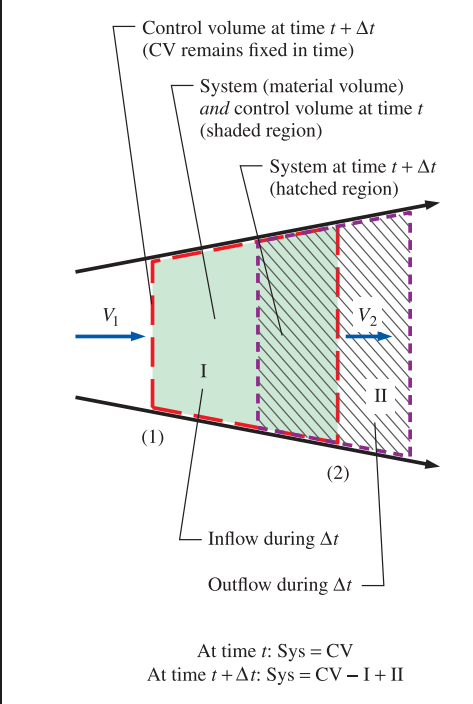

In [3]:
%matplotlib inline
from IPython.display import Image
Image('R:\\Projects\\04_Simulations\\04_AM2530_Fluid_Sims\\02_ReynoldsTransportTheorm\\RTT_Setup.png')

The setup is about a fixed control volume shaded in green, and a moving system covered by dashed boxes. Initially, assume that the system occupies the control volume(region I) at time $t$ and later moves to hashed box(region II) at time $t+\Delta t$

## 2. Some maths


For $B$ and $b = \dfrac{B}{m}$, we have 2 equations\
At times $ t $ and $ t+\Delta t $, the system is expressed as:

$$
B_{\text{sys}, t} = B_{\text{CV}, t} \qquad \text{(the system and CV coincide at time $t$)}
$$
$$
B_{\text{sys}, t+\Delta t} = B_{\text{CV}, t+\Delta t} - B_{\text{I}, t+\Delta t} + B_{\text{II}, t+\Delta t}
$$

Subtracting the first equation from the second one and dividing by $\Delta t$ gives

$$
\frac{B_{\text{sys}, t+\Delta t} - B_{\text{sys}, t}}{\Delta t} =
\frac{B_{\text{CV}, t+\Delta t} - B_{\text{CV}, t}}{\Delta t}
- \frac{B_{\text{I}, t+\Delta t}}{\Delta t}
+ \frac{B_{\text{II}, t+\Delta t}}{\Delta t}
$$

Taking the limit as $\Delta t \rightarrow 0$, and using the definition of derivative, we get

$$
\frac{dB_{\text{sys}}}{dt} =
\frac{dB_{\text{CV}}}{dt}
- \dot{B}_{\text{in}} + \dot{B}_{\text{out}}
$$

Thinking logically, 
$$ 
B = mb = \rho V b = \rho A x b\\
\dot{B} = b_2 \rho_2 V_2 A_2
$$


## 3. Observations, and Generalisation
By observation and intuitive thinking, the rate of change of an extensive property B of a system wrt time is that of change of a CV, and the flux through the CV. The case we just derived was a special case, however, we can extend it further.

We can define the flux part as 
$$ \dot{B_\text{net}} = \dot{B_\text{out}} - \dot{B_\text{in}} = \int_\text{CS} \rho b \left(\vec{V}\cdot \vec{n}\right) dA$$

and the Control Volume part as
$$B_\text{CV} = \int_\text{CV} \rho b dV$$

if you think about it, $\dot{B}_\text{CV}$ is the change in the properties at that time due to external factors(for example, mass/pressure/temperature and all that). Along with this change of $B$ due to region, other changes might occur just because the fluid is flowing in and out of the Control Volume, given by the $B_\text{flux}$ part

Thus, the RTT finally becomes
$$
\frac{d B_{\text{sys}}}{dt} = \frac{d}{dt} \int_{\text{CV}} \rho b \, dV + \int_{\text{CS}} \rho b \vec{V} \cdot \vec{n} \, dA
$$


## 4. More generalisation
This was assuming a fix CV. If the CV is moving, we sit in its frame, and thus have $V$, relative, in the flux part. 
$$
\frac{d B_{\text{sys}}}{dt} = \frac{d}{dt} \int_{\text{CV}} \rho b \, dV + \int_{\text{CS}} \rho b \vec{V_r} \cdot \vec{n} \, dA
$$

## 5. Special cases
For steady flow, the property B of the CV is a constant, making the $\frac{d}{dt} \int_{\text{CV}} \rho b \, dV$ term 0, 
$$
\frac{d B_{\text{sys, Steady Flow}}}{dt} = \int_{\text{CS}} \rho b \vec{V_r} \cdot \vec{n} \, dA
$$

## 6. Delving on...
$$ \int_{\text{CS}} \rho b \vec{V_r} \cdot \vec{n} \, dA = b_\text{avg}\int_{\text{CS}} \rho \vec{V_r} \cdot \vec{n} \, dA  = b_\text{avg} \dot{m}_r
$$

## 7. Switching gears
The form that we got was an integral form. Enough of theory now. Let's switch to our use case, and use the differential form. 

For our game/simulation, $B = m$, $b = m/m = 1$
This implies
$$
\frac{d m}{dt} = \frac{d}{dt} \int_{\text{CV}} \rho \left(1\right) \, dV + \int_{\text{CS}} \rho \left(1\right) \vec{V} \cdot \vec{n} \, dA
$$
From GDT, 
$$
\frac{d m}{dt} = \int_{\text{CV}} \frac{\partial}{\partial t} \rho\, dV + \int_{\text{CV}} \vec{\nabla}\cdot \left(\rho \vec{V}\right) \, dV = 0
$$
$$
\int_{\text{CV}} \frac{\partial}{\partial t} \rho\, dV + \vec{\nabla}\cdot \left(\rho \vec{V}\right) \, dV = 0
$$
As this is arbitrary for any Control Volume, 
$$\frac{\partial \rho}{\partial t} + \vec{\nabla}\cdot\left(\rho \vec{V}\right) = 0
$$

This is called the equation of continuity and is very important in both fluid mechanics and our game

# Specific Maths for the game

Now when you look at it, we need to apply some numerical methods to solve for this. We already have a time step defined. Lets take the first case when an ink is dropped at some point in game. We define density of each point as the density of color, given by
```python
def density(grid):
    return intensity(grid)/RESOLUTION**2
```
Now that I have written the code above, I realise, its much better to solve in numpy before sending to pygame for printing.

In [ ]:
import numpy as np
rho_grid = np.ones((10,10))
b_grid = np.zeros((10,10))
rho_grid[4:6,4:6] = 1.25
# rho_b_grid = rho_grid * b_grid
print(rho_grid)

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))
